# ITLA's Computational Social Science Model of Child Poverty and Social Assistance Pathways (CHERISH)

## Workshop 1 — Participatory Systems Mapping (Academics)

# IMPORTS

In [1]:
import pandas as pd
from pyvis import network as net
import networkx as nx
import matplotlib
import plotly.graph_objects as go
from st_aggrid import AgGrid

In [2]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "DIN Alternate"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

# FACTORS

read Factors spreadsheet

In [3]:
sheet_id = '1MQt451tCvDwlXjZBV0xO8kGUPDFFmGaZTXQYSJhUM4E'
sheet_name = 'Factors'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [4]:
df_factors=pd.read_csv(url)
#df_factors=pd.read_csv('PSM_factors.csv')

In [5]:
df_factors = df_factors.loc[:, ~df_factors.columns.str.contains('^Unnamed')]

In [6]:
df_factors

,node_group,short_name,long_name,node_id,node_importance,Controllability,Strategic_Importance,Uncertainty,Vulnerable_To_Change,Resistant_To_Change,Comments_Justification,Definition
0,1,PARENTS_1,Parent Mental health,1,5,low,NaN,NaN,NaN,NaN,NaN,NaN
1,1,PARENTS_2,Parent Separation,2,4,NaN,high,NaN,NaN,NaN,NaN,NaN
2,1,PARENTS_3,Parent Unemployment,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,SERVICES_1,Student counselling,4,5,NaN,NaN,NaN,high,NaN,NaN,NaN
4,2,SERVICES_2,Financial counselling,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,SERVICES_3,Family interventions,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,HEALTH_1,Mental health (own),7,5,NaN,NaN,NaN,NaN,high,NaN,NaN
7,3,HEALTH_2,Anxiety,8,4,NaN,NaN,high,NaN,NaN,NaN,NaN
8,3,HEALTH_3,Loneliness,9,3,medium,NaN,NaN,NaN,NaN,NaN,NaN
9,4,BENEFITS_1,Disability pension,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


style dataframe background colour on factor domains (node_group)

In [7]:
df_factors['node_group'] = df_factors['node_group'].astype(str)

def color_groups(row):
    group = row.loc["node_group"]
    if group == '1':
        color = 'lightblue'
    elif group == '2':
        color = 'lemonchiffon'
    elif group == '3':
        color = 'salmon'
    elif group == '4':
        color = 'lightgreen'
    elif group == '5':
        color = 'orchid'
    else:
        color= ''
    return ['background-color: %s' % color for r in row]

df_factors.style.apply(color_groups, axis=1)

,node_group,short_name,long_name,node_id,node_importance,Controllability,Strategic_Importance,Uncertainty,Vulnerable_To_Change,Resistant_To_Change,Comments_Justification,Definition
0,1,PARENTS_1,Parent Mental health,1,5,low,nan,nan,nan,nan,nan,nan
1,1,PARENTS_2,Parent Separation,2,4,nan,high,nan,nan,nan,nan,nan
2,1,PARENTS_3,Parent Unemployment,3,3,nan,nan,nan,nan,nan,nan,nan
3,2,SERVICES_1,Student counselling,4,5,nan,nan,nan,high,nan,nan,nan
4,2,SERVICES_2,Financial counselling,5,4,nan,nan,nan,nan,nan,nan,nan
5,2,SERVICES_3,Family interventions,6,3,nan,nan,nan,nan,nan,nan,nan
6,3,HEALTH_1,Mental health (own),7,5,nan,nan,nan,nan,high,nan,nan
7,3,HEALTH_2,Anxiety,8,4,nan,nan,high,nan,nan,nan,nan
8,3,HEALTH_3,Loneliness,9,3,medium,nan,nan,nan,nan,nan,nan
9,4,BENEFITS_1,Disability pension,10,5,nan,nan,nan,nan,nan,nan,nan


plot factors

In [8]:
G=nx.empty_graph()

for index, row in df_factors.iterrows():
    size=15
    if row['short_name']=='FOCAL_FACTOR': size=40
    group = row.loc["node_group"]
    if group == '1':
        color = 'lightblue'
    elif group == '2':
        color = 'lemonchiffon'
    elif group == '3':
        color = 'salmon'
    elif group == '4':
        color = 'lightgreen'
    elif group == '5':
        color = 'orchid'
    else:
        color= ''
    G.add_node(row['node_id'], label=row['long_name'], group=row['node_group'], size=size, color=color)
    
nt = net.Network(width='1500px', height='1500px', notebook=True, directed=True)
nt.from_nx(G)
nt.show_buttons(filter_=['physics'])
nt.show("G_factors.html")

# FACTORS AND RELATIONSHIPS

read relationships spreadsheet

In [9]:
df_relationships=pd.read_csv('PSM_relationships.csv')

In [10]:
df_relationships

,From,To,Type,Strength,Controllability,Strategic_Importance,Uncertainty,Vulnerable_To_Change,Resistant_To_Change,Comments / Justification,From_id,To_id
0,Parent Mental health,Housing aid,positive,weak,NaN,NaN,NaN,NaN,NaN,any additional information about the nature of...,1,11
1,Parent Mental health,Long-term social assistance use (2yr+),positive,weak,NaN,high,NaN,NaN,NaN,NaN,1,13
2,Parent Separation,Family interventions,positive,weak,NaN,NaN,NaN,NaN,NaN,NaN,2,6
3,Parent Separation,Long-term social assistance use (2yr+),negative,weak,NaN,NaN,NaN,high,NaN,NaN,2,13
4,Parent Unemployment,Long-term social assistance use (2yr+),positive,weak,NaN,NaN,NaN,NaN,NaN,NaN,3,13
5,Student counselling,Financial counselling,negative,strong,NaN,NaN,NaN,NaN,NaN,NaN,4,5
6,Student counselling,Disability pension,negative,weak,NaN,NaN,NaN,NaN,NaN,NaN,4,10
7,Student counselling,Housing aid,positive,weak,NaN,NaN,high,NaN,NaN,NaN,4,11
8,Student counselling,Long-term social assistance use (2yr+),positive,weak,low,NaN,NaN,NaN,NaN,NaN,4,13
9,Financial counselling,Parent Unemployment,positive,weak,NaN,NaN,NaN,NaN,NaN,NaN,5,3


plot network

In [11]:
G=nx.empty_graph(create_using=nx.DiGraph())

for index, row in df_factors.iterrows():
    size=15
    if row['short_name']=='FOCAL_FACTOR': size=40
    group = row.loc["node_group"]
    if group == '1':
        color = 'lightblue'
    elif group == '2':
        color = 'lemonchiffon'
    elif group == '3':
        color = 'salmon'
    elif group == '4':
        color = 'lightgreen'
    elif group == '5':
        color = 'orchid'
    else:
        color= ''
    G.add_node(row['node_id'], label=row['long_name'], group=row['node_group'], size=size, color=color)
    
show_weights = False

for index, row in df_relationships.iterrows():
    
    edge_from = row['From_id']
    edge_to = row['To_id']
    
    if show_weights==True:
        if row['Strength']=='weak': value=1
        if row['Strength']=='medium': value=2
        if row['Strength']=='strong': value=3
        G.add_edge(edge_from, edge_to, value=value)
    
    G.add_edge(edge_from, edge_to)

nt = net.Network(width='1500px', height='1500px', notebook=True, directed=True)
nt.from_nx(G)
nt.show_buttons(filter_=['physics'])
nt.inherit_edge_colors(False)
nt.show("G_factors_and_relationships.html")

# DESCRIPTIVE STATISTICS

## Node importance: Centrality

*What characterises an important factor?*

In [12]:
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df_nodes.drop(['size', 'color'], axis=1, inplace=True)
df_nodes

,label,group
1,Parent Mental health,1
2,Parent Separation,1
3,Parent Unemployment,1
4,Student counselling,2
5,Financial counselling,2
6,Family interventions,2
7,Mental health (own),3
8,Anxiety,3
9,Loneliness,3
10,Disability pension,4


**Centrality** measures are a vital tool for understanding networks, often also known as graphs.

These algorithms use graph theory to calculate the importance of any given node in a network. They cut through noisy data, revealing parts of the network that need attention – but they all work differently. Each measure has its own definition of *importance*, so you need to understand how they work to find the best one for your graph visualization applications.

Let’s look at some social network analysis measures, how they work, and when to use them.

### Degree centrality (local importance)

> - **Definition:** Degree centrality assigns an importance score based simply on the number of links held by each node.

> - **What it tells us:** How many direct, ‘one hop’ connections each node has to other nodes in the network.

> - **When to use it:** For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

> - **A bit more detail:** Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at *in-degree* (number of inbound links) and *out-degree* (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

#### In-Degree Centrality

In [13]:
in_degree_centrality_df = pd.DataFrame(nx.in_degree_centrality(G).items(), columns=["node", "in_degree_centrality"])
in_degree_centrality_df.index += 1
df_nodes.join(in_degree_centrality_df).drop(['node'], axis=1).sort_values("in_degree_centrality", ascending=False)

,label,group,in_degree_centrality
13,Long-term social assistance use (2yr+),5,0.916667
5,Financial counselling,2,0.416667
2,Parent Separation,1,0.333333
11,Housing aid,4,0.333333
3,Parent Unemployment,1,0.250000
8,Anxiety,3,0.250000
7,Mental health (own),3,0.166667
12,Rehabilitation allowance,4,0.166667
4,Student counselling,2,0.083333
6,Family interventions,2,0.083333


> ##### **INSIGHT #1: The Focal Factor has the highest in-degree centrality. Out of all the General Factors, Factor 5 (Financial Counselling) has the highest in-degree centrality. This implies Factor 5 is the most impacted by changes in other General Factors**

#### Out-Degree Centrality

In [14]:
out_degree_centrality_df = pd.DataFrame(nx.out_degree_centrality(G).items(), columns=["node", "out_degree_centrality"])
out_degree_centrality_df.index += 1
df_nodes.join(out_degree_centrality_df).drop(['node'], axis=1).sort_values("out_degree_centrality", ascending=False)

,label,group,out_degree_centrality
10,Disability pension,4,0.500000
6,Family interventions,2,0.416667
7,Mental health (own),3,0.416667
9,Loneliness,3,0.416667
4,Student counselling,2,0.333333
8,Anxiety,3,0.250000
1,Parent Mental health,1,0.166667
2,Parent Separation,1,0.166667
5,Financial counselling,2,0.166667
11,Housing aid,4,0.166667


> ##### **INSIGHT #2: If we look at out-degree centrality, Factor 10 (Disability Pension) is the most important Factor to connect to the rest of the General Factors. This means that A, B, C...**

### Closeness centrality (path spread importance)

> - **Definition:** Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.

> - **What it tells us:** This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths.

> - **When to use it:** For finding the individuals who are best placed to influence the entire network most quickly.

> - **A bit more detail:** Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers in a single cluster.

In [15]:
closeness_centrality_df = pd.DataFrame(nx.closeness_centrality(G).items(), columns=["node", "closeness_centrality"])
closeness_centrality_df.index += 1
df_nodes.join(closeness_centrality_df).drop(['node'], axis=1).sort_values("closeness_centrality", ascending=False)

,label,group,closeness_centrality
13,Long-term social assistance use (2yr+),5,0.916667
2,Parent Separation,1,0.444444
5,Financial counselling,2,0.421875
11,Housing aid,4,0.355556
3,Parent Unemployment,1,0.347222
12,Rehabilitation allowance,4,0.321429
8,Anxiety,3,0.313725
6,Family interventions,2,0.280702
7,Mental health (own),3,0.266667
4,Student counselling,2,0.205128


> ##### **INSIGHT #3: Based on the closeness centrality results, Factors 2 (Parent Separation) and 5 (Financial Counselling) are the most important. It implies that Factors 2 and 5 are closer to all the other factors with relative shorter shorest path lengths connecting all the other factors. If we want to intervene in the fastest amount of time, these Factors are good candidates**

### Betweenness centrality (In-between/broker/bridge/middleman importance)

> - **Definition:** Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

> - **What it tells us:** This measure shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.

> - **When to use it:** For finding the individuals who influence the flow around a system.

> - **A bit more detail:** Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.

#### Nodes

In [16]:
betweenness_centrality_df = pd.DataFrame(nx.betweenness_centrality(G).items(), columns=["node", "betweenness_centrality"])
betweenness_centrality_df.index += 1
df_nodes.join(betweenness_centrality_df).drop(['node'], axis=1).sort_values("betweenness_centrality", ascending=False)

,label,group,betweenness_centrality
7,Mental health (own),3,0.174242
6,Family interventions,2,0.170455
2,Parent Separation,1,0.162879
8,Anxiety,3,0.136364
11,Housing aid,4,0.090909
4,Student counselling,2,0.071970
5,Financial counselling,2,0.045455
10,Disability pension,4,0.041667
1,Parent Mental health,1,0.000000
3,Parent Unemployment,1,0.000000


> ##### **INSIGHT #4: Measuring the importance of a factor being the broker to connect the paths between any two other factors, Factors 7 (Mental Health - own) and 6 (Family Interventions) are the most important with the highest betweenness_centrality of 0.17. This implies that 17*2=34% of the shortest paths between any pair of nodes in the graph will pass through these two factors.**

#### Edges

We can apply the same framework to find an important edge that has node s and node t pass through the edge instead of a node.

In [17]:
edge_betweenness_centrality_df = pd.DataFrame(nx.edge_betweenness_centrality(G).items(), columns=["edge", "edge_betweenness_centrality"])
edge_betweenness_centrality_df.sort_values("edge_betweenness_centrality", ascending=False)

,edge,edge_betweenness_centrality
2,"(2, 6)",0.195513
22,"(8, 7)",0.160256
35,"(11, 2)",0.134615
13,"(6, 8)",0.118590
17,"(7, 4)",0.112179
6,"(4, 10)",0.086538
0,"(1, 11)",0.064103
12,"(6, 5)",0.051282
9,"(5, 3)",0.044872
32,"(10, 7)",0.038462


> ##### **INSIGHT #5: Measuring the importance of relationships being the bridge to connect the shortest paths between any two other factors, the relationship between Factors 2 and 6 is the most import edge with betweenness_centrality of 0.19. This implies that 19% of the shortest paths between any pair of nodes in the graph will pass through this relationship.**

### PageRank centrality (global inward importance)

> - **Definition:** PageRank is a variant of EigenCentrality, also assigning nodes a score based on their connections, and their connections’ connections. The difference is that PageRank also takes link direction and weight into account – so links can only pass influence in one direction, and pass different amounts of influence.

> - **What it tells us:** This measure uncovers nodes whose influence extends beyond their direct connections into the wider network.

> - **When to use it:** Because it takes into account direction and connection weight, PageRank can be helpful for understanding citations and authority.

> - **A bit more detail:** PageRank is famously one of the ranking algorithms behind the original Google search engine (the ‘Page’ part of its name comes from creator and Google founder, Larry Page).

In [18]:
pagerank_centrality_df = pd.DataFrame(nx.pagerank(G).items(), columns=["node", "pagerank_centrality"])
pagerank_centrality_df.index += 1
df_nodes.join(pagerank_centrality_df).drop(['node'], axis=1).sort_values("pagerank_centrality", ascending=False)

,label,group,pagerank_centrality
13,Long-term social assistance use (2yr+),5,0.279705
2,Parent Separation,1,0.091836
5,Financial counselling,2,0.082875
3,Parent Unemployment,1,0.080374
6,Family interventions,2,0.072469
11,Housing aid,4,0.071932
8,Anxiety,3,0.057472
7,Mental health (own),3,0.055751
12,Rehabilitation allowance,4,0.055236
4,Student counselling,2,0.042916


> ##### **INSIGHT #6: From the above sorted result table, we can observe Factors 2 (Parent Separation) and 5 (Financial Counselling) are the most important character in the network by PageRank score of 0.082-0.091. These factors received more important in-ward mentions in the entire network.**

### Authority and Hub scores (inward and outward importance)

> - **Definition:**
    - Authority score (inward importance) estimates the value of the content of the factor/inward link contributions.
    - Hub score (outward importance) estimates the value of a factor's links to other factors.
    

> - **What it tells us**:
    - A good hub (points out) represents a factor that pointed to many good authorities.
    - A good authority (takes in) represents a factor that is linked by many good hubs
    - For most networks, as 𝑘 gets larger, authority and hub scores converge to a unique value

In [19]:
# compute hub and auth centrality scores
hub_scores, auth_scores = nx.hits(G)
hub_centrality_df = pd.DataFrame(hub_scores.items(), columns=["node", "hub_centrality"])
auth_centrality_df = pd.DataFrame(auth_scores.items(), columns=["node", "auth_centrality"])
hub_centrality_df.index += 1
auth_centrality_df.index += 1

/Users/juancarloscastilla/mambaforge/envs/CHERISH/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [20]:
df_nodes.join(hub_centrality_df).drop(['node'], axis=1).sort_values("hub_centrality", ascending=False)

,label,group,hub_centrality
10,Disability pension,4,0.145216
9,Loneliness,3,0.131949
6,Family interventions,2,0.128875
7,Mental health (own),3,0.105363
4,Student counselling,2,0.100896
8,Anxiety,3,0.087757
11,Housing aid,4,0.069577
1,Parent Mental health,1,0.067496
5,Financial counselling,2,0.064417
2,Parent Separation,1,0.050438


> ##### **INSIGHT #7: From the above hub scores, we can observe Factor 10 (Disability Pension) is the most important node because it has connected towards many good authority factors. This finding is consistent with the out-degree centrality.**

In [21]:
df_nodes.join(auth_centrality_df).drop(['node'], axis=1).sort_values("auth_centrality", ascending=False)

,label,group,auth_centrality
13,Long-term social assistance use (2yr+),5,0.255040
5,Financial counselling,2,0.151670
2,Parent Separation,1,0.114521
8,Anxiety,3,0.103556
11,Housing aid,4,0.103471
3,Parent Unemployment,1,0.087117
12,Rehabilitation allowance,4,0.059740
7,Mental health (own),3,0.059417
4,Student counselling,2,0.026872
10,Disability pension,4,0.025732


> ##### **INSIGHT #8: From the above auth scores, we can observe Factor 5 (Financial Counselling) is the most important node because it recevied many links from good hub nodes. This finding is consistent with the in-degree centrality.**

## Centrality Summary

### Combine centrality measurement results

In [22]:
centrality_summary_df = in_degree_centrality_df\
    .merge(out_degree_centrality_df, on="node")\
    .merge(pagerank_centrality_df, on="node")\
    .merge(closeness_centrality_df, on="node")\
    .merge(betweenness_centrality_df, on="node")\
    .merge(hub_centrality_df, on="node")\
    .merge(auth_centrality_df, on="node")

centrality_summary_df.index += 1
centrality_summary_df = df_nodes.join(centrality_summary_df).drop(['node'], axis=1)

centrality_ranks = centrality_summary_df.rank(ascending=False, numeric_only=True, method="dense").astype(int)
test = centrality_summary_df.style.background_gradient(subset=list(centrality_ranks.columns[0:]), cmap='PuBu_r')
test

,label,group,in_degree_centrality,out_degree_centrality,pagerank_centrality,closeness_centrality,betweenness_centrality,hub_centrality,auth_centrality
1,Parent Mental health,1,0.000000,0.166667,0.033438,0.000000,0.000000,0.067496,0.000000
2,Parent Separation,1,0.333333,0.166667,0.091836,0.444444,0.162879,0.050438,0.114521
3,Parent Unemployment,1,0.250000,0.083333,0.080374,0.347222,0.000000,0.048016,0.087117
4,Student counselling,2,0.083333,0.333333,0.042916,0.205128,0.071970,0.100896,0.026872
5,Financial counselling,2,0.416667,0.166667,0.082875,0.421875,0.045455,0.064417,0.151670
6,Family interventions,2,0.083333,0.416667,0.072469,0.280702,0.170455,0.128875,0.012864
7,Mental health (own),3,0.166667,0.416667,0.055751,0.266667,0.174242,0.105363,0.059417
8,Anxiety,3,0.250000,0.250000,0.057472,0.313725,0.136364,0.087757,0.103556
9,Loneliness,3,0.000000,0.416667,0.033438,0.000000,0.000000,0.131949,0.000000
10,Disability pension,4,0.083333,0.500000,0.042558,0.166667,0.041667,0.145216,0.025732


### Rank node importance by centrality measure

In [23]:
df_nodes.join(centrality_ranks).style.background_gradient(cmap='PuBu')

,label,group,in_degree_centrality,out_degree_centrality,pagerank_centrality,closeness_centrality,betweenness_centrality,hub_centrality,auth_centrality
1,Parent Mental health,1,7,5,12,12,9,8,12
2,Parent Separation,1,3,5,2,2,3,10,3
3,Parent Unemployment,1,4,6,4,5,9,11,6
4,Student counselling,2,6,3,10,10,6,5,9
5,Financial counselling,2,2,5,3,3,7,9,2
6,Family interventions,2,6,2,5,8,2,3,11
7,Mental health (own),3,5,2,8,9,1,4,8
8,Anxiety,3,4,4,7,7,4,6,4
9,Loneliness,3,7,2,12,12,9,2,12
10,Disability pension,4,6,1,11,11,8,1,10


With so many measures, it's hard to study which one is important. We use ensemble approach by taking the average centrality to study which one is the most important node.

In [24]:
# compute the average ranking using the above ranks
average_ranks = pd.DataFrame(round(centrality_ranks.mean(axis=1)).astype(int), columns=["average_rank"])
average_ranks.insert(loc=0, column='node', value=centrality_summary_df["label"])
average_ranks.sort_values("average_rank").style.background_gradient(subset=["average_rank"], cmap='PuBu')

,node,average_rank
2,Parent Separation,4
5,Financial counselling,4
6,Family interventions,5
7,Mental health (own),5
8,Anxiety,5
11,Housing aid,5
13,Long-term social assistance use (2yr+),5
3,Parent Unemployment,6
4,Student counselling,7
10,Disability pension,7


> ##### **INSIGHT #10: After computing the average ranking, Factors 2 (Parent Separation) and 5 (Financial Counselling) are the most important factor sin this system with average rank of 4. Factor 1 (Parent Mental Health) is the least important character based on the average ranking.**

### Visualise all centrality measures

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

In [26]:
def draw(G, pos, measures, measure_name, ax):
    
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    plt.title(measure_name)
    plt.colorbar(nodes)
    #plt.axis('off')
    plt.show()

In [27]:
pos = nx.kamada_kawai_layout(G)

/Users/juancarloscastilla/mambaforge/envs/CHERISH/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


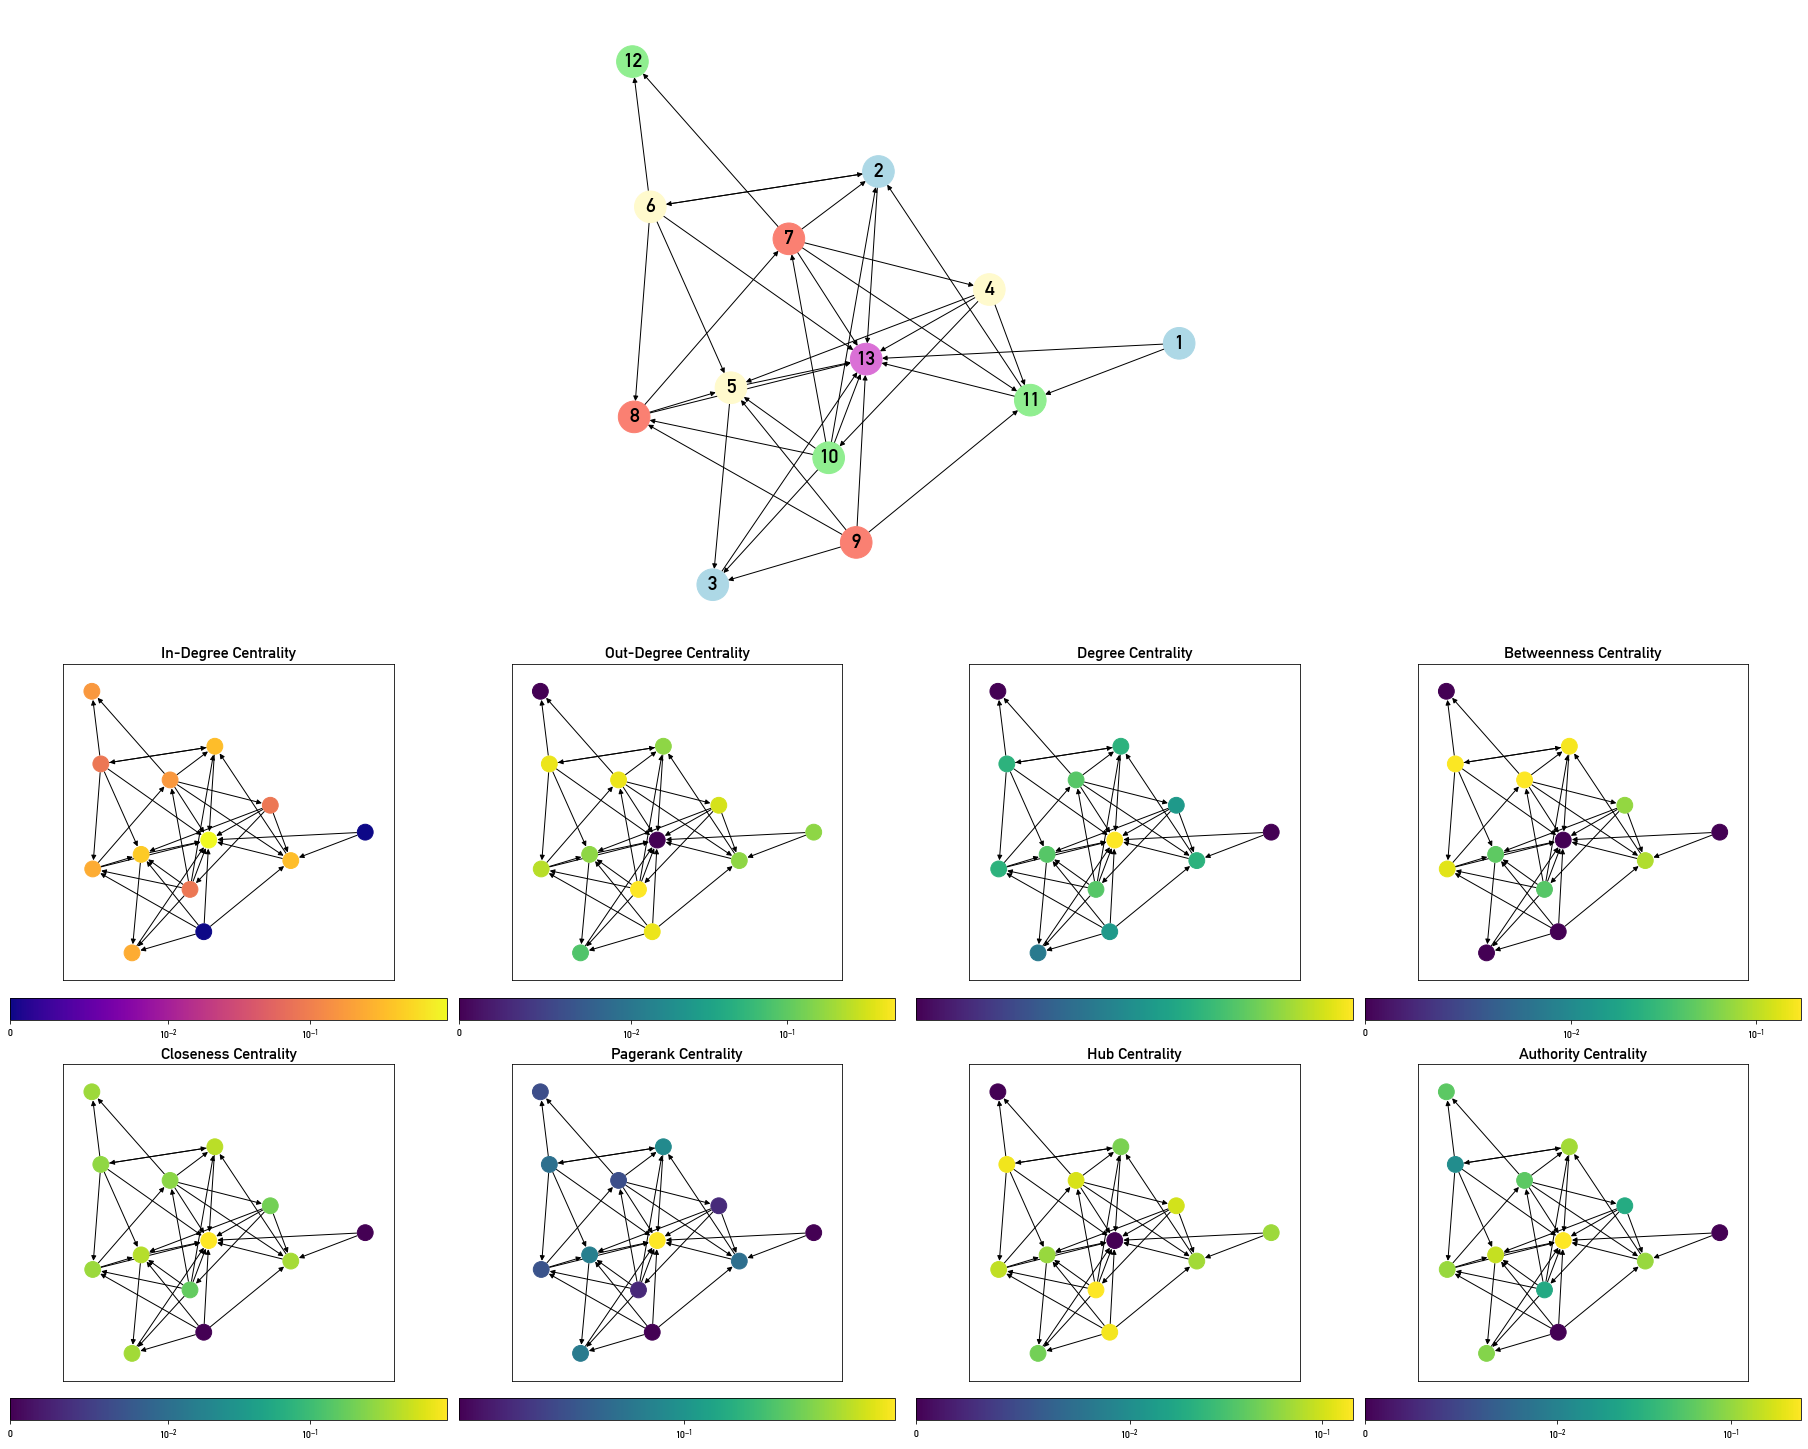

In [28]:
f = plt.figure(constrained_layout=True, figsize=(25,20))
gs = f.add_gridspec(4, 4)

f_ax2 = f.add_subplot(gs[0:2,1:3])
#f_ax2.set_title('table of factors')
f_ax2.set_aspect('equal')

f_ax3 = f.add_subplot(gs[2, 0])
f_ax3.set_title('in-degree centrality')
f_ax3.set_aspect('equal')

f_ax4 = f.add_subplot(gs[2, 1])
f_ax4.set_title('out-degree centrality')
f_ax4.set_aspect('equal')

f_ax5 = f.add_subplot(gs[2, 2])
f_ax5.set_title('degree centrality')
f_ax5.set_aspect('equal')

f_ax6 = f.add_subplot(gs[2, 3])
f_ax6.set_title('betweenness centrality')
f_ax6.set_aspect('equal')

f_ax7 = f.add_subplot(gs[3, 0])
f_ax7.set_title('in-degree centrality')
f_ax7.set_aspect('equal')

f_ax8 = f.add_subplot(gs[3, 1])
f_ax8.set_title('out-degree centrality')
f_ax8.set_aspect('equal')

f_ax9 = f.add_subplot(gs[3, 2])
f_ax9.set_title('degree centrality')
f_ax9.set_aspect('equal')

f_ax10 = f.add_subplot(gs[3, 3])
f_ax10.set_title('betweenness centrality')
f_ax10.set_aspect('equal')

# create empty list for node colors
node_color = []

# for each node in the graph
for node in G.nodes(data=True):

    # if the node has the attribute group1
    if '1' in node[1]['group']:
        node_color.append('lightblue')

    # if the node has the attribute group1
    elif '2' in node[1]['group']:
        node_color.append('lemonchiffon')

    # if the node has the attribute group1
    elif '3' in node[1]['group']:
        node_color.append('salmon')

    # if the node has the attribute group1
    elif '4' in node[1]['group']:
        node_color.append('lightgreen')

    # if the node has the attribute group1
    elif '5' in node[1]['group']:
        node_color.append('orchid') 
        
nx.draw(G, pos, ax=f_ax2, with_labels=True, font_size=20, width=1, node_size=1000,node_color=node_color)

# in-degree centrality
measure_name = 'In-Degree Centrality'
measures = nx.in_degree_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax3, node_size=250, cmap=plt.cm.plasma, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax3)
f_ax3.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax3,location='bottom')

# out-degree centrality
measure_name = 'Out-Degree Centrality'
measures = nx.out_degree_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax4, node_size=250, cmap=plt.cm.viridis, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax4)
f_ax4.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax4,location='bottom')

# degree centrality
measure_name = 'Degree Centrality'
measures = nx.degree_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax5, node_size=250, cmap=plt.cm.viridis, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax5)
f_ax5.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax5,location='bottom')

# betweenness centrality
measure_name = 'Betweenness Centrality'
measures = nx.betweenness_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax6, node_size=250, cmap=plt.cm.viridis, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax6)
f_ax6.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax6,location='bottom')

# closeness centrality
measure_name = 'Closeness Centrality'
measures = nx.closeness_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax7, node_size=250, cmap=plt.cm.viridis, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax7)
f_ax7.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax7,location='bottom')

# pagerank centrality
measure_name = 'Pagerank Centrality'
measures = nx.pagerank(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax8, node_size=250, cmap=plt.cm.viridis, node_color=list(measures.values()), nodelist=measures.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax8)
f_ax8.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax8,location='bottom')

# hub centrality
measure_name = 'Hub Centrality'
h,a = nx.hits(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax9, node_size=250, cmap=plt.cm.viridis, node_color=list(h.values()), nodelist=h.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax9)
f_ax9.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax9,location='bottom')

# authority centrality
measure_name = 'Authority Centrality'
h,a = nx.hits(G)
nodes = nx.draw_networkx_nodes(G, pos, ax=f_ax10, node_size=250, cmap=plt.cm.viridis, node_color=list(a.values()), nodelist=a.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, ax=f_ax10)
f_ax10.set_title(measure_name, size=16, weight='bold')
plt.colorbar(nodes,ax=f_ax10,location='bottom')


In [30]:
node_color

['lightblue',
 'lightblue',
 'lightblue',
 'lemonchiffon',
 'lemonchiffon',
 'lemonchiffon',
 'salmon',
 'salmon',
 'salmon',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orchid']

In [29]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [31]:
G.nodes(data=True)

NodeDataView({1: {'label': 'Parent Mental health', 'group': '1', 'size': 15, 'color': 'lightblue'}, 2: {'label': 'Parent Separation', 'group': '1', 'size': 15, 'color': 'lightblue'}, 3: {'label': 'Parent Unemployment', 'group': '1', 'size': 15, 'color': 'lightblue'}, 4: {'label': 'Student counselling', 'group': '2', 'size': 15, 'color': 'lemonchiffon'}, 5: {'label': 'Financial counselling', 'group': '2', 'size': 15, 'color': 'lemonchiffon'}, 6: {'label': 'Family interventions', 'group': '2', 'size': 15, 'color': 'lemonchiffon'}, 7: {'label': 'Mental health (own)', 'group': '3', 'size': 15, 'color': 'salmon'}, 8: {'label': 'Anxiety', 'group': '3', 'size': 15, 'color': 'salmon'}, 9: {'label': 'Loneliness', 'group': '3', 'size': 15, 'color': 'salmon'}, 10: {'label': 'Disability pension', 'group': '4', 'size': 15, 'color': 'lightgreen'}, 11: {'label': 'Housing aid', 'group': '4', 'size': 15, 'color': 'lightgreen'}, 12: {'label': 'Rehabilitation allowance', 'group': '4', 'size': 15, 'color'

In [50]:
node_color = []
for node in G.nodes(data=True):
    node_color.append(node[1]['color'])
node_color

['lightblue',
 'lightblue',
 'lightblue',
 'lemonchiffon',
 'lemonchiffon',
 'lemonchiffon',
 'salmon',
 'salmon',
 'salmon',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orchid']

In [53]:
pd.DataFrame.from_dict(G.nodes, orient='index').color.to_list()

['lightblue',
 'lightblue',
 'lightblue',
 'lemonchiffon',
 'lemonchiffon',
 'lemonchiffon',
 'salmon',
 'salmon',
 'salmon',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orchid']

In [57]:
pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index').color.to_list()

['lightblue',
 'lightblue',
 'lightblue',
 'lemonchiffon',
 'lemonchiffon',
 'lemonchiffon',
 'salmon',
 'salmon',
 'salmon',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orchid']

In [59]:
nx.degree_centrality(G)

{1: 0.16666666666666666,
 2: 0.5,
 3: 0.3333333333333333,
 4: 0.41666666666666663,
 5: 0.5833333333333333,
 6: 0.5,
 7: 0.5833333333333333,
 8: 0.5,
 9: 0.41666666666666663,
 10: 0.5833333333333333,
 11: 0.5,
 12: 0.16666666666666666,
 13: 0.9166666666666666}